<a href="https://colab.research.google.com/github/Taein5415/Hongong_Machinelearning_Deeplearning/blob/main/08_2_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#패션 MNIST 데이터 불러오기
먼저 데이터 스케일을 0~255에서 0~1 사이로 바꾸고, 훈련 세트와 검증 세트로 나눈다.  


이때 한가지 작업이 다르다. 완전 연결 신경망에서는 입력 이미지를 밀집층에 연결하기 위해 일렬로 펼쳐야 하지만, 합성곱 신경망은 2차원 이미지를 그대로 사용하기 때문에 일렬로 펼치지 않는다.

입력 이미지는 항상 깊이(채널) 차원이 있어야 한다. 흑백 이미지의 경우 채널 차원이 없는 2차원 배열이지만, Conv2D 층을 사용하기 위해 마지막에 이 채ㅐ널 차원을 추가해야 한다.

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1,28,28,1)/255.0            ## 2차원 배열이므로 (*1,28,28,1) 의 매개변수 사용

train_scaled, val_scaled, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 1s 0us/step


##합성곱 신경망 만들기
전형적인 합성곱 신경망의 구조는 합성곱 층으로 이미지에서 특징을 감지한 후 밀집층으로 클래스에 다른 분류 확률을 계삲나다. 케라스의 Sequential 클래스를 사용해 순서대로 구조를 정의한다.

Sequential 클래스의 객체를 만들고 첫번재 합성곱 층인 Conv2D 를 추가한다.

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

위의 합성곱 층은 32개의 필터를 사용한다. 커널의 크기는 (3,3)이고 렐루 활성화 함수와 세임 패딩을 사용한다.     
또한 입력의 차원을 (28, 28, 1)로 지정한다.

다음으로 풀링 층을 추가한다.  MaxPooling2D 와 AveragePooling2D 클래스로 제공한다. 전형적인 (2,2) 크기로 사용한다.

In [5]:
model.add(keras.layers.MaxPooling2D(2))

패션 MNIST 이미지가 (28,28) 크기에 세임 패딩을 적용했기 때문에 합성곱 층에서 출력된 측성 맵의 가로 세로 크기는 입력과 동일하다.

다음으로 첫번째 합성 곱 층과 같이 두 번재 합성곱(폴링 층)을 추가한다.      
두번째 합성곱 층은 첫 번째와 거의 같지만 필터의 개수를 64개로 늘렸다.

In [6]:
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(3))

이 합성곱 층은 세임 패딩을 사용한다. 64개의 필터를 사용했으므로 최종적으로 만들어지는 특성 맵의 크기는 (7, 7, 64)가 될 것이다.

당므으로 3차원 특성 맵을 일렬로 펼친다     
이 이유는 마지막에 10개의 뉴런을 가진 출력층에서 확률을 계산하기 때문이다.    
이를 위해 특성 맵을 일렬로 펼쳐 바로 출력층에 전달하지 않고 중간에 하나의 밀집 은닉층을 하나 더 둔다. Flatten 클래스 다음에 Dense 은닉층, 마지막으로 Dense 출력층의 순서대로 구성한다.

In [7]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0,4))
model.add(keras.layers.Dense(10, activation='softmax'))

은닉층과 출력층 사이에 드롭아웃을 넣어 은닉층의 과대적합을 막아 성늗을 개선해준다.     
은닉층은 100개의 뉴런을 사용하고 활성화 함수는 합성곱 층과 마찬가지로 렐루 함수를 사용한다.       
패션 MNIST 데이터셋을 클래스 10개를 분류하는 다중 분류 문제이므로 마지막 층의 활성화 함수는 소프트맥스이다.

케라스의 모델 구성을 마쳤으므로 summary() 메서드로 모델 구조를 확인한다.

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 100)               1

출력 결과를 보면 합성곱 층과 풀링 층의 효과가 잘 나타나있다.

첫 번째 합성곱 층을 통과하면서 특성 맵의 깊이는 32가 되고, 두번째 합성곱에서 특성 맵의 크기가 64로 늘어난다. 그러나 특성 배의 가로세로 크기는 첫 번재 풀링 층에서 절반으로 줄어들고, 두번째 풀링층에서 다시 절반으로 더 줄어든다.      
최종 특성 맵의 크기는 (7,7,64) 이다.

케라스는 summary() 메서드 외어도 층의 구성을 그림으로 표현해주는 plot_model() 함수를 keras.utils 패키지에서 재공한다.

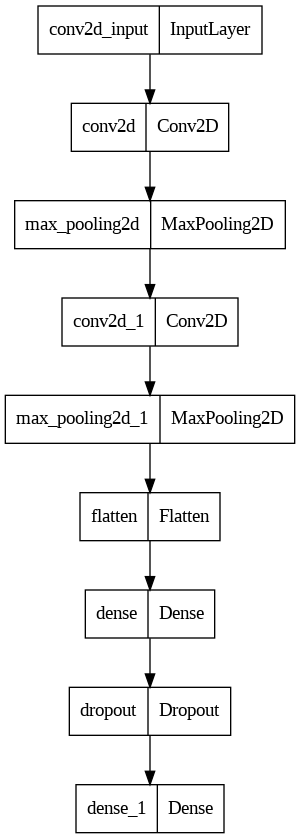

In [9]:
keras.utils.plot_model(model)

show_shapes 매개변수를 True로 지정하면 입력과 출력의 크기 또한 표시해준다. 그리고 to_file 매개변수에 파일 이름을 지정하면 출력한 이미지를 파일로 저장한다. dpi 매개변수로 해상도를 지정할 수도 있다.

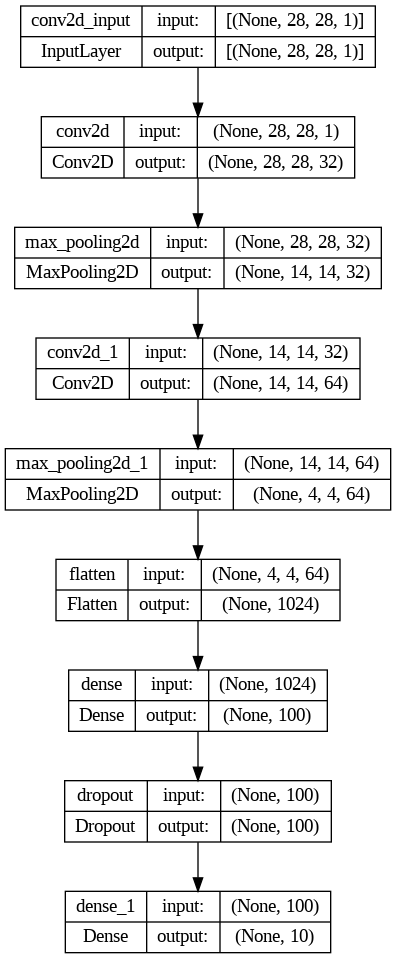

In [10]:
keras.utils.plot_model(model, show_shapes = True)

#모델 컴파일과 훈련
Adam 옵티마이저를 사용하고 ModelCheckpoint 콜백과 EarlyStopping 콜백을 함께 사용하여 조기 종료 기법을 구현한다.

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 84s 56ms/step - loss: 0.3182 - accuracy: 0.8841 - val_loss: 0.3183 - val_accuracy: 0.8848
Epoch 2/20
1500/1500 [==============================] - 73s 49ms/step - loss: 0.2744 - accuracy: 0.8978 - val_loss: 0.3085 - val_accuracy: 0.8878
Epoch 3/20
1500/1500 [==============================] - 72s 48ms/step - loss: 0.2538 - accuracy: 0.9047 - val_loss: 0.3086 - val_accuracy: 0.8904
Epoch 4/20
1500/1500 [==============================] - 81s 54ms/step - loss: 0.2325 - accuracy: 0.9135 - val_loss: 0.2968 - val_accuracy: 0.8934
Epoch 5/20
1500/1500 [==============================] - 79s 53ms/step - loss: 0.2189 - accuracy: 0.9158 - val_loss: 0.3119 - val_accuracy: 0.8974
Epoch 6/20
1500/1500 [==============================] - 74s 49ms/step - loss: 0.2015 - accuracy: 0.9220 - val_loss: 0.3017 - val_accuracy: 0.8989


훈련 세트의 정확도가 좋아진것을 알 수 있다. 손실 그래프를 그려 조기 종료가 잘 이루어졌는지 확인한다.

<ipython-input-22-7fd8b0c3d185>:6: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend('train', 'val')


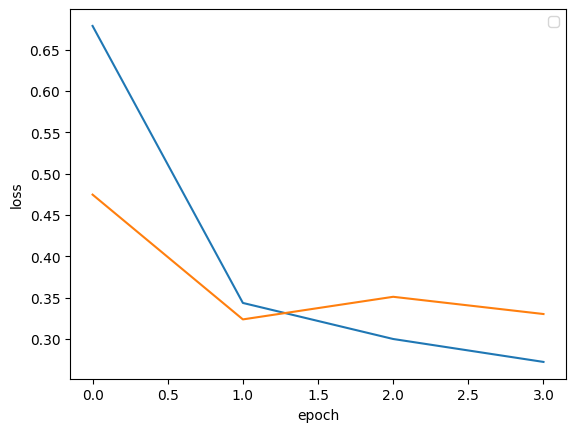

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend('train', 'val')

plt.show()

fit() 메서드의 출력중 아홉 번째 에포트의 출력과 동일하다.


---



predict 메서드를 사용해 훈련된 모델을 사용하여 새로운 데이터에 대해 예측을 만들어본다.

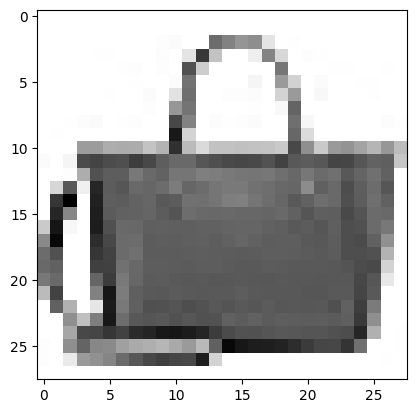

In [16]:
plt.imshow(val_scaled[0].reshape(28,28), cmap='gray_r')
plt.show()

핸드백 이미지이다. 이 이미지에 대해 어떤 예측을 하는지 확인해본다.

In [17]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 [==============================] - 0s 280ms/step
[[5.6320936e-15 8.9967604e-16 2.8644567e-13 5.2117723e-13 1.6534003e-12
  4.9055456e-15 3.1788923e-14 1.9522918e-12 1.0000000e+00 9.2159602e-13]]


결과를 보면 아홉 번째 값이 1이고 다른 값은 0에 가까운 값이 나온다. 이 모델은 이 이미지가 아홉번째 클래스라고 주장하는 것이다.     
이를 그래프로 보면 다음과 같이 출력된다.

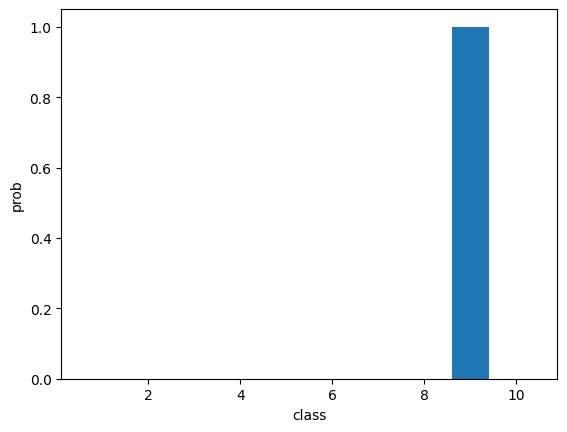

In [18]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob')
plt.show()

아홉 번째 클래스가 실제로 무엇인지는 데이터셋의 정의를 참고해야 한다. 레이블을 다루기 위해 클래스의 이름을 리스트로 저장한다.

In [19]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

preds 배열에서 가장 큰 인덱스르 찾아 classes 리스트의 인덱스로 사용할 수 있다.

In [20]:
import numpy as np
print(classes[np.argmax(preds)])

가방


가방이라고 예측된다.

이제 이 모델에 대한 테스트 세트에 대한 성능을 측정한다.     
먼저 픽셀 값의 범위를 바꾸고 이미지의 크기를 바꾼다.

In [21]:
test_scaled = test_input.reshape(-1, 28, 28, 1)

model.evaluate(test_scaled, test_target)

313/313 [==============================] - 5s 15ms/step - loss: 0.3480 - accuracy: 0.8735


[0.3479735255241394, 0.8734999895095825]

테스트 세트의 점수는 검증 세트보다 조금 작다 약 91%의 성능을 기대할 수 있다.